In [1]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import accuracy_score

In [2]:
def loaddata():
    data = np.loadtxt('data/data1.txt',delimiter=',')
    n = data.shape[1] - 1  # 特征数
    X = data[:, 0:n]
    y = data[:, -1].reshape(-1, 1)
    return X, y

In [3]:
X,y = loaddata()

### 使用逻辑回归模型
常用参数含义：
  - C 正则化参数$\lambda$的倒数,C越大，惩罚越小，易过拟合，泛化能力差。C越小，惩罚越大，不易过拟合，泛化能力好。
  - multi_class: ovr, multinomial
  

In [4]:
model = linear_model.LogisticRegression(C=50,max_iter=2000)
model.fit(X,y)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
print(model.coef_)
print(model.intercept_)
y_hat = model.predict(X)
print("准确度=",accuracy_score(y,y_hat))

[[0.14488841 0.13932118]]
[-17.48138031]
准确度= 0.89


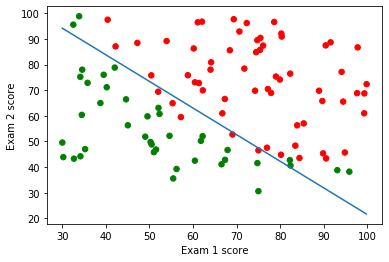

In [6]:
def plotDescisionBoundary(X,y,theta):
    cm_dark = mpl.colors.ListedColormap(['g', 'r'])
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.scatter(X[:,0],X[:,1],c=np.array(y).squeeze(),cmap=cm_dark,s=30)

    #化分类决策面 theta0+theta1*x1+theta2*x2 = 0
    # x1 = np.arange(20,110,0.1)
    x1 = np.arange(min(X[:, 0]), max(X[:, 0]), 0.1)
    x2 = -(theta[1]*x1+theta[0])/theta[2]
    plt.plot(x1,x2)
    plt.show()
theta = np.append(model.intercept_,model.coef_)
plotDescisionBoundary(X,y,theta)